# Project: Investigate a Dataset - [No-Shows Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and  ‘Yes’ if they did not show up.

### Question(s) for Analysis
>**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to create visualisations
%matplotlib inline
import seaborn as sns

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.5MB/s eta 0:00:01  9% |███                             | 983kB 26.3MB/s eta 0:00:01    36% |███████████▊                    | 3.8MB 30.8MB/s eta 0:00:01    48% |███████████████▋                | 5.1MB 28.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   14% |████▊                           | 2.0MB 26.4MB/s eta 0:00:01    24% |███████▉                        | 3.3MB 28.4MB/s eta 0:00:01    63% |████████████████████▌           | 8.6MB 27.6MB/s eta 0:00:01    73% |███████████████████████▌        | 9.8MB 27.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
# There are some columns need to correct like Hipertensen and No-show and i will make all columns in lower case

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()
# There are 110527 rows and 14 columns in database and i will change data type for PatientId , ScheduledDay , AppointmentDay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()
#I will remove min age and max age 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# rename columns name 
df.rename(columns={'PatientId': 'patient_id', 'AppointmentID': 'appointment_id', 'Gender': 'gender', 
                   'ScheduledDay': 'scheduled_day','AppointmentDay': 'appointment_day','Age': 'age', 
                   'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension': 'hypertension',
                   'Handcap': 'handicap', 'Diabetes': 'diabetes', 'Alcoholism': 'alcoholism', 
                   'SMS_received': 'sms_received', 'No-show': 'no_show'
                  }, inplace=True)
df.head(1)


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
#change data type for patient_id , scheduled_day , appointment_day
df['patient_id'] = df['patient_id'].astype(int)
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [10]:
# I will take the ages between 0 to 100
df = df[(df['age'] >= 0) & (df['age'] <= 100)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110519 non-null int64
appointment_id     110519 non-null int64
gender             110519 non-null object
scheduled_day      110519 non-null datetime64[ns]
appointment_day    110519 non-null datetime64[ns]
age                110519 non-null int64
neighbourhood      110519 non-null object
scholarship        110519 non-null int64
hypertension       110519 non-null int64
diabetes           110519 non-null int64
alcoholism         110519 non-null int64
handicap           110519 non-null int64
sms_received       110519 non-null int64
no_show            110519 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Are there relation between gender and no show appointments?

In [11]:
df_gender = df.groupby('gender').no_show.value_counts()
df_gender

gender  no_show
F       No         57241
        Yes        14591
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [31]:
def gender_no_shows_per():
    total = len(df.index)
    female_per = (df_gender['F']['Yes']/total) * 100
    male_per = (df_gender['M']['Yes']/total) * 100
    print("{}% of females no show to the appointment".format(female_per.round(2)))
    print("{}% of males no show to the appointment.".format(male_per.round(2)))
gender_no_shows_per()

13.2% of females no show to the appointment
6.99% of males no show to the appointment.


In [33]:
def gender_show_per():
    total = len(df.index)
    female_per = (df_gender['F']['No']/total) * 100
    male_per = (df_gender['M']['No']/total) * 100
    print("{}% of females show to the appointment.".format(female_per.round(2)))
    print("{}% of males show to the appointment".format(male_per.round(2)))
gender_show_per()

51.79% of females show to the appointment.
28.02% of males show to the appointment


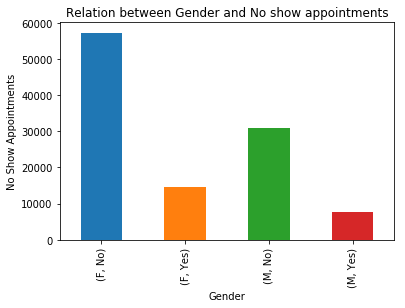

In [34]:
df_gender.plot(kind='bar');
plt.title('Relation between Gender and No show appointments');
plt.xlabel('Gender');
plt.ylabel('No Show Appointments');

**Tip**: Gender hasn't effect in show or no show appointments

### Q2:Are there relation between ages and no show appointments

In [13]:
age_group = [0,10,20,40,65,100]
labels = ['0-10','11-20','21-40','41-65','+65']
df['age_group'] = pd.cut(df['age'], bins=age_group, labels=labels, right=False)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,41-65
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41-65
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,41-65
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-10
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-65


In [14]:
df_age = df.groupby(['age_group']).no_show.value_counts()

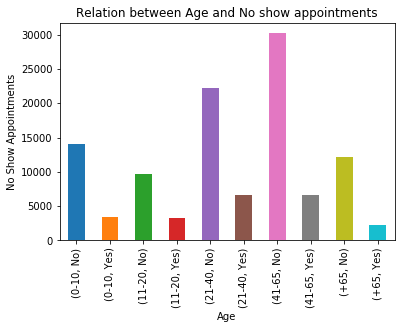

In [15]:
df_age.plot(kind='bar');
plt.title('Relation between Age and No show appointments');
plt.xlabel('Age');
plt.ylabel('No Show Appointments');

**Tip**: Ages has effect in show or no show appointments

### Q3: Which neighborhoods have the top 10 of no-shows appointments?

In [16]:
df_nbrhd = df.query('no_show == "Yes"').groupby('neighbourhood').no_show.count()
df_nbrhd.sort_values(ascending=False, inplace=True)
df_nbrhd.head(10)

neighbourhood
JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: no_show, dtype: int64

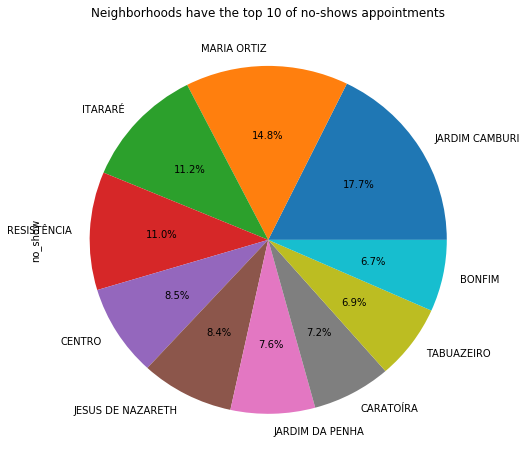

In [17]:
values = df_nbrhd[:10]
labels = df_nbrhd.index[:10]
values.plot(kind="pie",figsize=(8,8),autopct='%1.1f%%');
plt.title("Neighborhoods have the top 10 of no-shows appointments");


**Tip**: Neighbourhood has effect in show or no show appointments

### Q4: what is the relation between scheduled day and no show appointments?

In [18]:
df['scheduled_day_of_week'] = pd.to_datetime(df['scheduled_day']).dt.day_name()
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,scheduled_day_of_week
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,41-65,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41-65,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,41-65,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-10,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-65,Friday


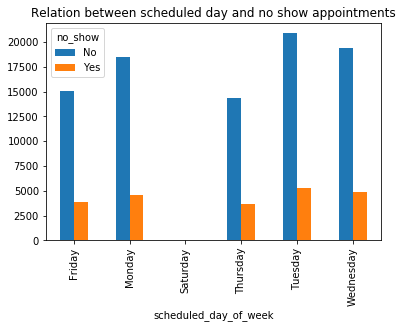

In [19]:
day_of_week = df.groupby('scheduled_day_of_week')['no_show'].value_counts(normalize=False).unstack().plot(kind='bar')
day_of_week.set_title("Relation between scheduled day and no show appointments")
plt.show()

**Tip**: Scheduled day has effect in show or no show appointments

### Q6: Are there relation between SMS received and no show appointments?

In [20]:
df_sms = df.groupby('sms_received').no_show.value_counts()
df_sms

sms_received  no_show
0             No         62506
              Yes        12532
1             No         25697
              Yes         9784
Name: no_show, dtype: int64

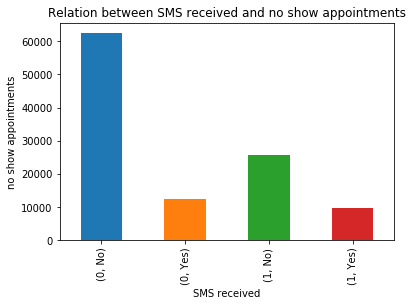

In [22]:
df_sms.plot(kind='bar');
plt.title('Relation between SMS received and no show appointments');
plt.xlabel('SMS received');
plt.ylabel('no show appointments');

**Tip**: SMS received hasn't effect in show or no show appointments

<a id='conclusions'></a>
## Conclusions
I looked into the dataset and fixed a few problems like removing wrong data, correct wrong names and changing datatype for some variables.
I also checked most of independent variables in the dataset and made a few observations compare them to the dependent one (no_show).
#The most important findings are:
- I found ages , nieghbourhood and scheduled day have effect in show or no show appointments and I observed Gender and SMS received don't have same effect like other factors.
- The number of female approximately twice the number of male
- The highest ages show in appointment between 41-65 ages
- There are 81 nieghbourhoods and the highest nieghbourhood in no show appointments (JARDIM CAMBURI)
- There aren't data on saturday so it's vacation
- There are many patient didn't receive SMS


## Limitation

*The data set includes mistakes  like age with negtive value and the data type of appointment day and scheduled day.
*The number of show for patients didn't receive SMS more than who received SMS. That's mean the SMS had no effect in reducing the number of no-show.
*The number of female approximately twice the number of male so i can't depends on this factor 

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0